<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Text_Processing_by_e_commerce_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sastrawi
!pip install emoji
!pip install swifter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, nltk, emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import swifter

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Read data
tx = pd.read_csv('/content/Ulasan Shopee 2000 Data.csv')
tx

ulasan  label
0     Aplikasi di update terus, Kolom searching sang...      1
1     Aplikasi berat sekali untuk handphone dengan s...      1
2     Bagus, sangat membantu. Tapi sayangnya lemot s...      3
3     Tolong perbaiki banyak bug, masa saya pake wif...      2
4     Aplikasinya sangat lambat dan sering ngefreeze...      1
...                                                 ...    ...
1995  Makin kesini kenapa Sekarang shopee sering ngl...      1
1996  Lemottttttt. Hp kenceng, wifi kenceng. Shopee?...      1
1997  Sangat nyaman belanja di Shopee..karena ongkir...      5
1998  Dah lama gak pakai shopee, coba install lg.. S...      2
1999  Rekomendasi deh pastinya cobain aj kalo pengen...      5

[2000 rows x 2 columns]

In [ ]:
def check_values(tx):
    data = []
    for col in tx.columns:
        data.append([col, \
                  tx[col].dtype, \
                  tx[col].isna().sum(), \
                  round(100*(tx[col].isna().sum()/len(tx)), 2), \
                  tx[col].nunique(), \
                  tx[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(tx)

kolom dataType  null  nullPercentage  unique  \
0  ulasan   object     0             0.0    2000   
1   label    int64     0             0.0       5   

                                              values  
0  [Aplikasi di update terus, Kolom searching san...  
1                                    [1, 3, 2, 5, 4]

In [ ]:
tx.replace({"label":{5:"Positive",4:"Positive",3:"Neutral",2:"Negative",1:"Negative"}}, inplace=True)
tx

ulasan     label
0     Aplikasi di update terus, Kolom searching sang...  Negative
1     Aplikasi berat sekali untuk handphone dengan s...  Negative
2     Bagus, sangat membantu. Tapi sayangnya lemot s...   Neutral
3     Tolong perbaiki banyak bug, masa saya pake wif...  Negative
4     Aplikasinya sangat lambat dan sering ngefreeze...  Negative
...                                                 ...       ...
1995  Makin kesini kenapa Sekarang shopee sering ngl...  Negative
1996  Lemottttttt. Hp kenceng, wifi kenceng. Shopee?...  Negative
1997  Sangat nyaman belanja di Shopee..karena ongkir...  Positive
1998  Dah lama gak pakai shopee, coba install lg.. S...  Negative
1999  Rekomendasi deh pastinya cobain aj kalo pengen...  Positive

[2000 rows x 2 columns]

In [ ]:
def printData(data):
  for item in data:
    print(item)
printData(tx['ulasan'])

Aplikasi di update terus, Kolom searching sangat tidak berfungsi sebagai mana mestinya, misal cari SSD 500GB Merk A, maka merk lain dan ukuran lain tetap muncul!!! Filter juga sangat jelek, sering kali sudah pakai filter untuk wilayah tertentu malah blank, padahal ketika filter dimatikan, lokasi yg termasuk di filter tadi ada!!! 👎👎👎
Aplikasi berat sekali untuk handphone dengan spesifikasi RAM 8GB, prosesor SD712 Octacore, OS android 11. Aplikasi sudah versi terbaru, jaringan internet kuat dan cepat (silahkan team shopee cari alasan lainnya hehe). Tidak terbayang betapa lambatnya aplikasi ini di hp dengan spesifikasi di bawahnya.
Bagus, sangat membantu. Tapi sayangnya lemot sekali, kirain jaringan saya yang bermasalah. Ternyata mmg dari aplikasi shopee yang lemot, jadi malas klo mau lihat2 terlalu lama. Biasa juga sementara lagi scroll kebawah, tiba2 produknya hilang berganti dengan produk lain. Anehh.. tolong diperbaiki dong aplikasinya. Versi app saya sudah yang terbaru, tapi tetap le

In [ ]:
def deleteEmoji(text):
  allchars = [str for str in text]
  emoji_list = [c for c in allchars if c in emoji.distinct_emoji_list(text)]
  clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
  return clean_text
tx['ulasan'] = tx['ulasan'].apply(deleteEmoji)

In [ ]:
def clearEmoji(ulasan):
  return ulasan.encode('ascii', 'ignore').decode('ascii')
tx['ulasan'] = tx['ulasan'].apply(clearEmoji)

In [ ]:
printData(tx['ulasan'])

Aplikasi di update terus, Kolom searching sangat tidak berfungsi sebagai mana mestinya, misal cari SSD 500GB Merk A, maka merk lain dan ukuran lain tetap muncul!!! Filter juga sangat jelek, sering kali sudah pakai filter untuk wilayah tertentu malah blank, padahal ketika filter dimatikan, lokasi yg termasuk di filter tadi ada!!!
Aplikasi berat sekali untuk handphone dengan spesifikasi RAM 8GB, prosesor SD712 Octacore, OS android 11. Aplikasi sudah versi terbaru, jaringan internet kuat dan cepat (silahkan team shopee cari alasan lainnya hehe). Tidak terbayang betapa lambatnya aplikasi ini di hp dengan spesifikasi di bawahnya.
Bagus, sangat membantu. Tapi sayangnya lemot sekali, kirain jaringan saya yang bermasalah. Ternyata mmg dari aplikasi shopee yang lemot, jadi malas klo mau lihat2 terlalu lama. Biasa juga sementara lagi scroll kebawah, tiba2 produknya hilang berganti dengan produk lain. Anehh.. tolong diperbaiki dong aplikasinya. Versi app saya sudah yang terbaru, tapi tetap lemot


In [ ]:
def cleaningUlasan(ulasan):
  ulasan = ulasan.strip(' ')
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = re.sub(r'\(cont\)'," ", ulasan)
  ulasan = re.sub(r'#([^\s]+)', '', ulasan)
  ulasan = re.sub(r'\d+', ' ', ulasan)
  ulasan = re.sub('[!"”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', ' ', ulasan)
  ulasan = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|
\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))\n''', '', ulasan)
  return ulasan

tx['ulasan']= tx['ulasan'].apply(cleaningUlasan)

In [ ]:
def casefoldingText(ulasan):
  ulasan = ulasan.lower() # lower case
  ulasan = ulasan.translate(str.maketrans("","",string.punctuation)) # menghilangkan tanda baca
  ulasan = ulasan.strip() # Menghilangkan whitespaces
  return ulasan
tx['ulasan'] = tx['ulasan'].apply(casefoldingText)

In [ ]:
def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan
tx['ulasan'] =  tx['ulasan'].apply(tokenizingText)

In [ ]:
printData(tx['ulasan'])

['aplikasi', 'di', 'update', 'terus', 'kolom', 'searching', 'sangat', 'tidak', 'berfungsi', 'sebagai', 'mana', 'mestinya', 'misal', 'cari', 'ssd', 'gb', 'merk', 'a', 'maka', 'merk', 'lain', 'dan', 'ukuran', 'lain', 'tetap', 'muncul', 'filter', 'juga', 'sangat', 'jelek', 'sering', 'kali', 'sudah', 'pakai', 'filter', 'untuk', 'wilayah', 'tertentu', 'malah', 'blank', 'padahal', 'ketika', 'filter', 'dimatikan', 'lokasi', 'yg', 'termasuk', 'di', 'filter', 'tadi', 'ada']
['aplikasi', 'berat', 'sekali', 'untuk', 'handphone', 'dengan', 'spesifikasi', 'ram', 'gb', 'prosesor', 'sd', 'octacore', 'os', 'android', 'aplikasi', 'sudah', 'versi', 'terbaru', 'jaringan', 'internet', 'kuat', 'dan', 'cepat', 'silahkan', 'team', 'shopee', 'cari', 'alasan', 'lainnya', 'hehe', 'tidak', 'terbayang', 'betapa', 'lambatnya', 'aplikasi', 'ini', 'di', 'hp', 'dengan', 'spesifikasi', 'di', 'bawahnya']
['bagus', 'sangat', 'membantu', 'tapi', 'sayangnya', 'lemot', 'sekali', 'kirain', 'jaringan', 'saya', 'yang', 'berma

In [ ]:
!pip install indoNLP

In [ ]:
from indoNLP.preprocessing import replace_slang, replace_word_elongation, remove_stopwords

In [ ]:
def replace_slang_func(ulasan):
  ulasan = replace_slang(ulasan)
  return ulasan

In [ ]:
printData(tx['ulasan'])

['aplikasi', 'di', 'update', 'terus', 'kolom', 'searching', 'sangat', 'tidak', 'berfungsi', 'sebagai', 'mana', 'mestinya', 'misal', 'cari', 'ssd', 'gb', 'merk', 'a', 'maka', 'merk', 'lain', 'dan', 'ukuran', 'lain', 'tetap', 'muncul', 'filter', 'juga', 'sangat', 'jelek', 'sering', 'kali', 'sudah', 'pakai', 'filter', 'untuk', 'wilayah', 'tertentu', 'malah', 'blank', 'padahal', 'ketika', 'filter', 'dimatikan', 'lokasi', 'yg', 'termasuk', 'di', 'filter', 'tadi', 'ada']
['aplikasi', 'berat', 'sekali', 'untuk', 'handphone', 'dengan', 'spesifikasi', 'ram', 'gb', 'prosesor', 'sd', 'octacore', 'os', 'android', 'aplikasi', 'sudah', 'versi', 'terbaru', 'jaringan', 'internet', 'kuat', 'dan', 'cepat', 'silahkan', 'team', 'shopee', 'cari', 'alasan', 'lainnya', 'hehe', 'tidak', 'terbayang', 'betapa', 'lambatnya', 'aplikasi', 'ini', 'di', 'hp', 'dengan', 'spesifikasi', 'di', 'bawahnya']
['bagus', 'sangat', 'membantu', 'tapi', 'sayangnya', 'lemot', 'sekali', 'kirain', 'jaringan', 'saya', 'yang', 'berma

In [ ]:
daftar_stopword = stopwords.words('indonesian','english')
add_sw = ["belanja","pisa", "bah", "bah", "bah ", "ss", "wl","id", "o","wi","tami","gan", "yrs","ah","tf","frre","ya","qa","o", "wl", "ekh","dei","lot","ya","aplikasi","shopee","nih", "pod", "gd", "bo", "thd", "wf", "ol", "shg", "ku", "mem",
          "si", "sept","kec","at","oya","mut","net","shh","dalan","tep","com","dm","gr","bi",
          "sia", "jor", "b", "pt", "r", "ih", "kgk","meng", "ng" ,"rek", "lo" ,"okt" , "t","sat", "kak" ,"ig",
          "wkwkwkwk", "wkwk", "wk", "wkwkwk","duh", "ber" ,"e","a","mu","aps","di","shhh","hmmm",
          "tis","mah","sep","bla","daru","kb","pam","pr","tok","tik","loh","eh","dih","ups","oh","huh","du","se'main",
          "se'indonesia","pf","is", "mnrt", "p", "lho", "wkwk", "nb", "cf" ,"yt", "dam", "ok","om" ,"ng'lag", "byee",
          "dc","dul" ,"set" ,"mp","g","di","he", "hm", "jm", "xxx","va","vod", "kg", "bis", "kah", "dkt","l", "apa²", "☺️",
          "nge", "tktk", "ket","ter", "the", "cobaw", "log","bnyax","gak","dsb", "'", "kali","yg","dg","rt","an","yth","nya",
          "gb","me","gih","deh","tuh","sih","ti","angat"]
daftar_stopword.extend(add_sw)
daftar_stopword = set(daftar_stopword)
def stopwordText(words):
  return [word for word in words if word not in daftar_stopword]
tx['ulasan'] = tx['ulasan'].apply(stopwordText)

In [ ]:
printData(tx['ulasan'])

['update', 'kolom', 'searching', 'berfungsi', 'mestinya', 'cari', 'ssd', 'merk', 'merk', 'ukuran', 'muncul', 'filter', 'jelek', 'pakai', 'filter', 'wilayah', 'blank', 'filter', 'dimatikan', 'lokasi', 'filter']
['berat', 'handphone', 'spesifikasi', 'ram', 'prosesor', 'sd', 'octacore', 'os', 'android', 'versi', 'terbaru', 'jaringan', 'internet', 'kuat', 'cepat', 'silahkan', 'team', 'cari', 'alasan', 'hehe', 'terbayang', 'betapa', 'lambatnya', 'hp', 'spesifikasi', 'bawahnya']
['bagus', 'membantu', 'sayangnya', 'lemot', 'kirain', 'jaringan', 'bermasalah', 'mmg', 'lemot', 'malas', 'klo', 'lihat', 'scroll', 'kebawah', 'produknya', 'hilang', 'berganti', 'produk', 'anehh', 'tolong', 'diperbaiki', 'aplikasinya', 'versi', 'app', 'terbaru', 'lemot']
['tolong', 'perbaiki', 'bug', 'pake', 'wifi', 'hp', 'snapdragon', 'gagal', 'reload', 'perbaikilah', 'filternya', 'pencariannya', 'dikit', 'ditemukan', 'hasil', 'pencariannya', 'kalo', 'sesuaikan', 'ktp', 'android', 'susah', 'pencarian', 'barang', 'ala

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
  return stemmer.stem(term)
term_dict = {}
for document in tx['ulasan']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '

for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)
  print(term, ':', term_dict[term])

def stemmingText(document):
  return [term_dict[term] for term in document]
tx['ulasan'] = tx['ulasan'].swifter.apply(stemmingText)

Output streaming akan dipotong hingga 5000 baris terakhir.
musik : musik
puyeng : puyeng
pala : pala
ama : ama
tim : tim
ngejejalin : ngejejalin
mempertimbangkan : timbang
kmampuan : kmampuan
standar : standar
beredar : edar
indonesia : indonesia
endingnya : endingnya
tokopedia : tokopedia
akses : akses
lakukan : laku
mengakses : akses
force : force
claim : claim
poin : poin
input : input
cm : cm
introspeksi : introspeksi
berkualitas : kualitas
transfer : transfer
sebalik : balik
embel : embel
offline : offline
langsung : langsung
asli : asli
palsu : palsu
applikasinya : applikasinya
menyebabkan : sebab
sentuh : sentuh
kualitas : kualitas
diaplikasi : aplikasi
tagihan : tagih
kebutuhan : butuh
mendesak : desak
tersedia : sedia
negri : negri
kendalanya : kendala
memuat : muat
streaming : streaming
cacat : cacat
perbaikin : perbaikin
apliksi : apliksi
puas : puas
memuaskan : muas
sepeleh : peleh
serius : serius
katain : katain
suruh : suruh
ujungnya : ujung
mencoba : coba
kukira : kira
a

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

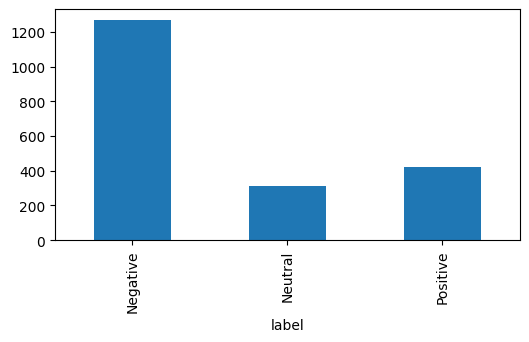

In [ ]:
label = tx['label'].value_counts().sort_index().plot(kind='bar', figsize=(6, 3))

**Analisis teks**

In [ ]:
def calculate_frequency_distribution(tx):
  words = [word for words in tx['ulasan']for word in words]
  fqdist = FreqDist(words)
  return fqdist

In [ ]:
fqdist_tx = calculate_frequency_distribution(tx)
top_100 = fqdist_tx.most_common(100)
top_100

[('lot', 777),
 ('aja', 711),
 ('ongkir', 648),
 ('buka', 532),
 ('ga', 528),
 ('barang', 518),
 ('tolong', 500),
 ('baik', 498),
 ('udah', 494),
 ('banget', 475),
 ('gratis', 462),
 ('update', 436),
 ('bagus', 421),
 ('aplikasi', 362),
 ('jaring', 354),
 ('kirim', 348),
 ('berat', 318),
 ('bayar', 312),
 ('kalo', 300),
 ('beli', 297),
 ('video', 282),
 ('hp', 264),
 ('apk', 261),
 ('lancar', 260),
 ('fitur', 245),
 ('pakai', 240),
 ('suka', 238),
 ('jual', 226),
 ('kecewa', 220),
 ('pake', 212),
 ('biaya', 211),
 ('loading', 208),
 ('produk', 196),
 ('voucher', 191),
 ('susah', 185),
 ('gk', 185),
 ('rb', 178),
 ('mohon', 174),
 ('tp', 172),
 ('pesan', 170),
 ('toko', 168),
 ('pas', 165),
 ('guna', 164),
 ('bikin', 164),
 ('baru', 163),
 ('cari', 162),
 ('bintang', 162),
 ('kasih', 162),
 ('masuk', 155),
 ('mahal', 154),
 ('kadang', 153),
 ('nyaman', 152),
 ('udh', 149),
 ('layan', 146),
 ('parah', 144),
 ('lambat', 143),
 ('mudah', 143),
 ('potong', 142),
 ('lelet', 140),
 ('hapus', 

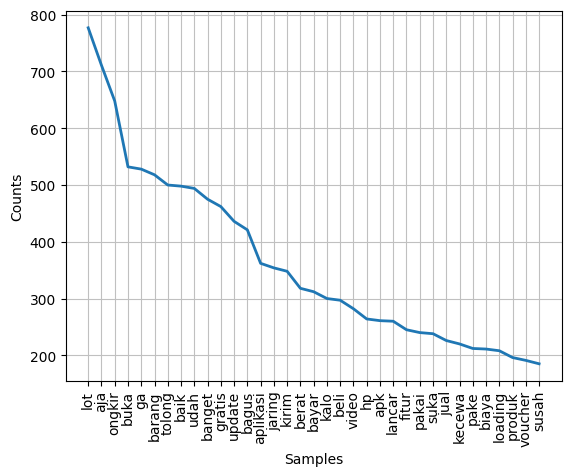

In [ ]:
fqdist_tx = calculate_frequency_distribution(tx)
fqdist_tx.plot(35, cumulative=False)
plt.show()

In [ ]:
tx_positif = tx[tx['label'] == 'Positive']
fqdist_positif = calculate_frequency_distribution(tx_positif)
top_50 = fqdist_positif.most_common(50)
top_50

[('barang', 161),
 ('ongkir', 154),
 ('bagus', 133),
 ('gratis', 123),
 ('kirim', 98),
 ('tolong', 95),
 ('mudah', 95),
 ('baik', 94),
 ('aja', 89),
 ('banget', 79),
 ('beli', 71),
 ('suka', 71),
 ('lot', 69),
 ('produk', 67),
 ('aplikasi', 64),
 ('jual', 63),
 ('buka', 61),
 ('bantu', 59),
 ('bayar', 59),
 ('cepat', 57),
 ('udah', 57),
 ('harga', 53),
 ('voucher', 53),
 ('ga', 52),
 ('kasih', 52),
 ('kalo', 47),
 ('terima', 47),
 ('pakai', 46),
 ('pesan', 46),
 ('mohon', 43),
 ('update', 43),
 ('pilih', 43),
 ('cari', 43),
 ('rb', 43),
 ('moga', 42),
 ('kadang', 41),
 ('sesuai', 41),
 ('berat', 40),
 ('toko', 39),
 ('belanja', 38),
 ('layan', 38),
 ('tp', 37),
 ('murah', 36),
 ('nyaman', 36),
 ('kecewa', 35),
 ('butuh', 35),
 ('terimakasih', 35),
 ('masuk', 35),
 ('apk', 34),
 ('jaring', 33)]

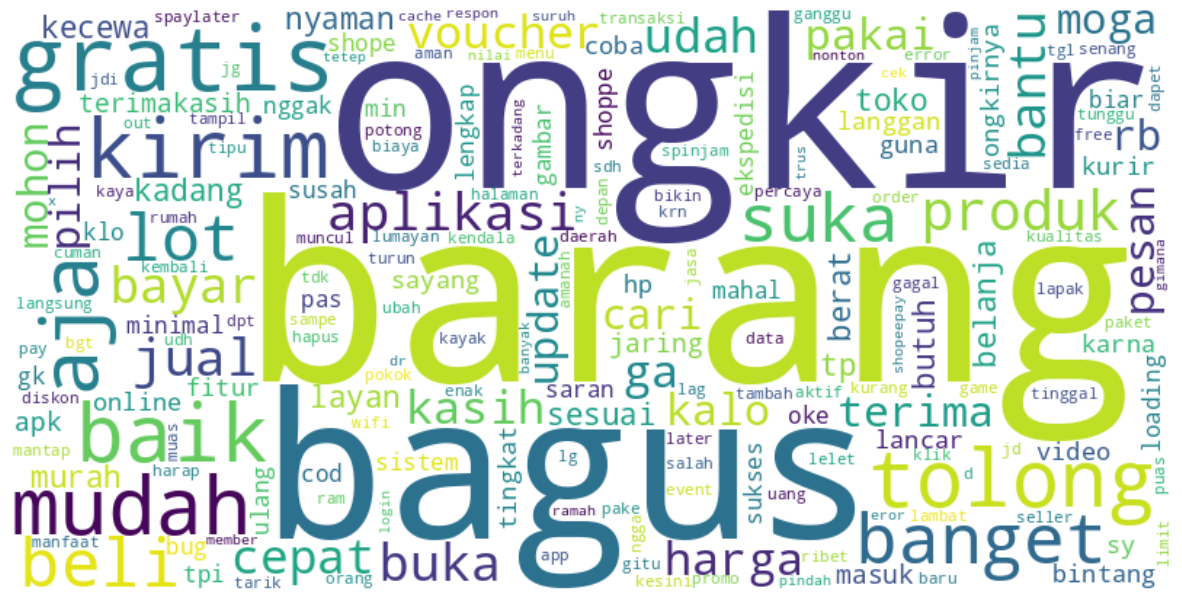

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fqdist_positif)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tx_negatif = tx[tx['label'] == 'Negative']
fqdist_negatif = calculate_frequency_distribution(tx_negatif)
top_50 = fqdist_negatif.most_common(50)
top_50

[('lot', 583),
 ('aja', 530),
 ('ga', 397),
 ('buka', 387),
 ('udah', 359),
 ('ongkir', 354),
 ('update', 317),
 ('banget', 317),
 ('baik', 308),
 ('tolong', 306),
 ('barang', 292),
 ('jaring', 268),
 ('gratis', 246),
 ('berat', 231),
 ('aplikasi', 229),
 ('video', 225),
 ('kalo', 215),
 ('bagus', 213),
 ('bayar', 211),
 ('kirim', 205),
 ('lancar', 191),
 ('hp', 190),
 ('beli', 187),
 ('fitur', 181),
 ('apk', 181),
 ('biaya', 176),
 ('kecewa', 158),
 ('pake', 155),
 ('loading', 153),
 ('pakai', 150),
 ('jual', 136),
 ('susah', 133),
 ('gk', 133),
 ('suka', 129),
 ('bikin', 128),
 ('parah', 121),
 ('baru', 118),
 ('guna', 115),
 ('hapus', 108),
 ('toko', 108),
 ('lelet', 105),
 ('pesan', 103),
 ('bintang', 102),
 ('lambat', 100),
 ('tp', 100),
 ('potong', 99),
 ('pas', 99),
 ('udh', 98),
 ('voucher', 98),
 ('kesini', 97)]

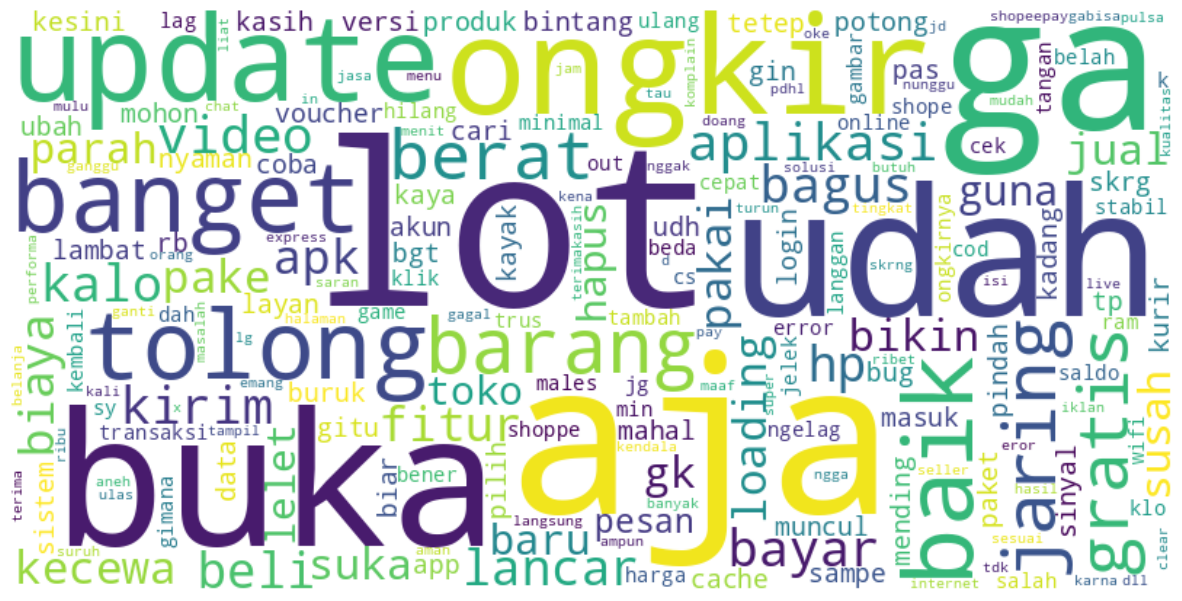

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fqdist_negatif)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tx_netral = tx[tx['label'] == 'Neutral']
fqdist_netral = calculate_frequency_distribution(tx_netral)
top_50 = fqdist_netral.most_common(50)
top_50

[('ongkir', 140),
 ('lot', 125),
 ('tolong', 99),
 ('baik', 96),
 ('gratis', 93),
 ('aja', 92),
 ('buka', 84),
 ('ga', 79),
 ('banget', 79),
 ('udah', 78),
 ('update', 76),
 ('bagus', 75),
 ('aplikasi', 69),
 ('barang', 65),
 ('jaring', 53),
 ('berat', 47),
 ('apk', 46),
 ('kirim', 45),
 ('pakai', 44),
 ('hp', 43),
 ('bayar', 42),
 ('lancar', 41),
 ('pas', 41),
 ('voucher', 40),
 ('mohon', 39),
 ('beli', 39),
 ('rb', 39),
 ('kalo', 38),
 ('pake', 38),
 ('suka', 38),
 ('kadang', 37),
 ('produk', 35),
 ('udh', 35),
 ('tp', 35),
 ('loading', 35),
 ('fitur', 34),
 ('mahal', 34),
 ('sinyal', 31),
 ('susah', 30),
 ('muncul', 29),
 ('bintang', 29),
 ('cari', 28),
 ('gk', 28),
 ('video', 28),
 ('ongkirnya', 28),
 ('jual', 27),
 ('kecewa', 27),
 ('min', 27),
 ('baru', 26),
 ('kasih', 26)]

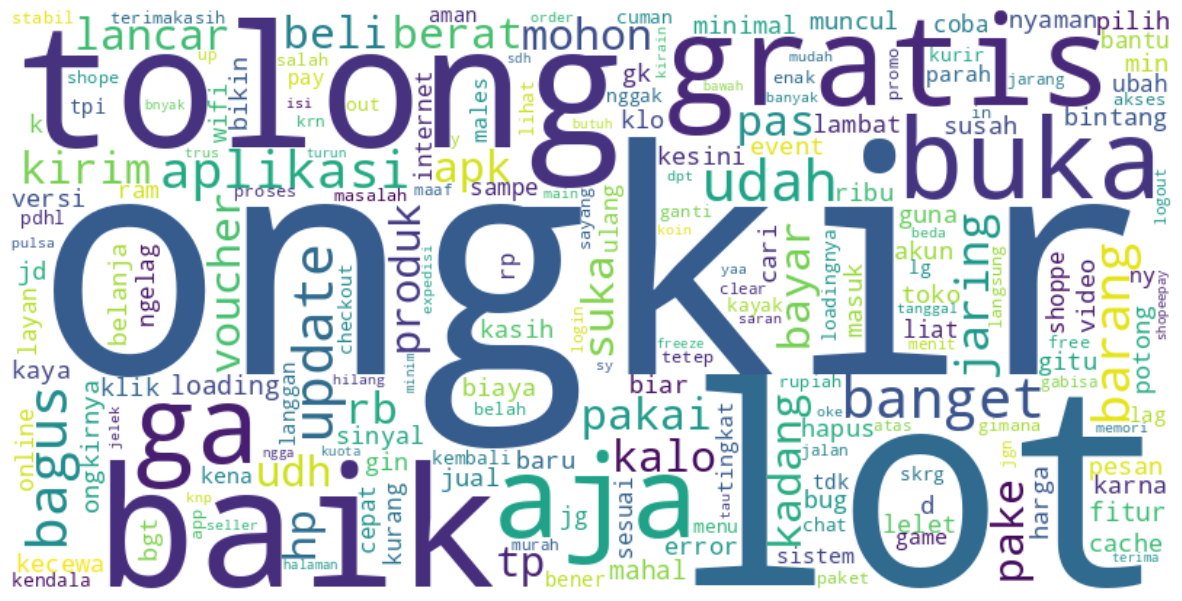

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fqdist_netral)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tx['ulasan'].astype('U'))
y = tx['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


nb= MultinomialNB().fit(X_train, y_train)
pred = nb.predict(X_test)
multinomialNB_accuracy = accuracy_score(y_test, pred)
print('MultinomialNB Accuracy', multinomialNB_accuracy)
print(f'Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, pred, zero_division=0)}')

MultinomialNB Accuracy 0.66
Confusion Matrix: 
 [[259   0   0]
 [ 66   0   0]
 [ 70   0   5]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       259
           1       0.00      0.00      0.00        66
           2       1.00      0.07      0.12        75

    accuracy                           0.66       400
   macro avg       0.55      0.36      0.31       400
weighted avg       0.61      0.66      0.54       400



In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_svm = svm.SVC(kernel='linear').fit(X_train, y_train)
pred = model_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, pred)
print('SVM Accuracy', svm_accuracy)
print(f'Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, pred, zero_division=0)}')

SVM Accuracy 0.73
Confusion Matrix: 
 [[251   2   6]
 [ 59   1   6]
 [ 35   0  40]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       259
           1       0.33      0.02      0.03        66
           2       0.77      0.53      0.63        75

    accuracy                           0.73       400
   macro avg       0.61      0.51      0.50       400
weighted avg       0.67      0.73      0.66       400



In [ ]:
print('Akurasi dengan Machine Learning')
print('Multinomial Naive Bayes', multinomialNB_accuracy)
print('SVM:', svm_accuracy)

Akurasi dengan Machine Learning
Multinomial Naive Bayes 0.66
SVM: 0.73
